**Question 1**

Le dataset Iris est un jeu de données emblématique en statistique et apprentissage automatique.

Origine :
Il a été créé par Ronald A. Fisher en 1936 dans le cadre d'une étude sur l'analyse discriminante et il est souvent utilisé pour démontrer des algorithmes de classification et des méthodes d'analyse des données.

Les variables :
Le dataset contient 150 observations réparties équitablement sur 3 classes d'espèces d'iris :

Setosa, Versicolor, et Virginica (50 échantillons par espèce).
Chaque observation comporte 4 variables indépendantes (caractéristiques mesurées en cm) :

Sepal Length (longueur du sépale)
Sepal Width (largeur du sépale)
Petal Length (longueur du pétale)
Petal Width (largeur du pétale)

La variable cible est l'espèce d'iris à laquelle appartient chaque observation.

Objectifs :
-Classification
-Visualisation des données
-Analyse discriminante
-Apprentissage automatique

**Question 2**


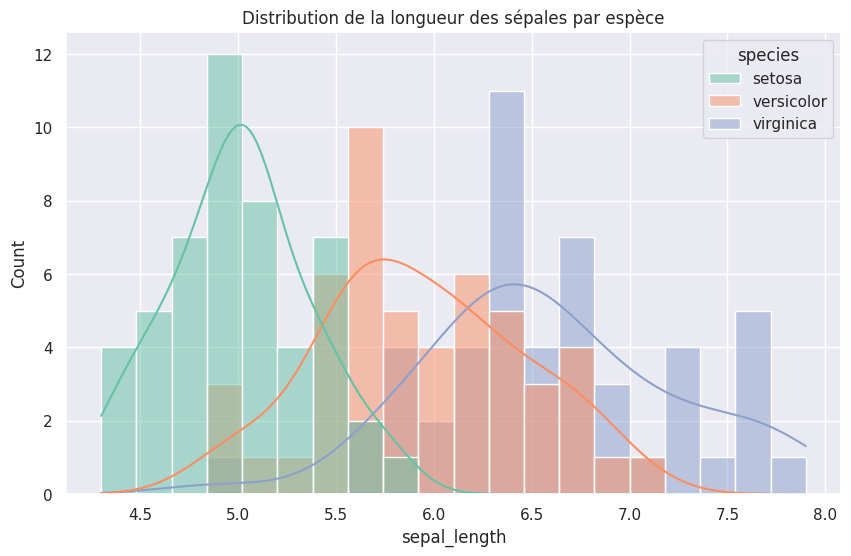

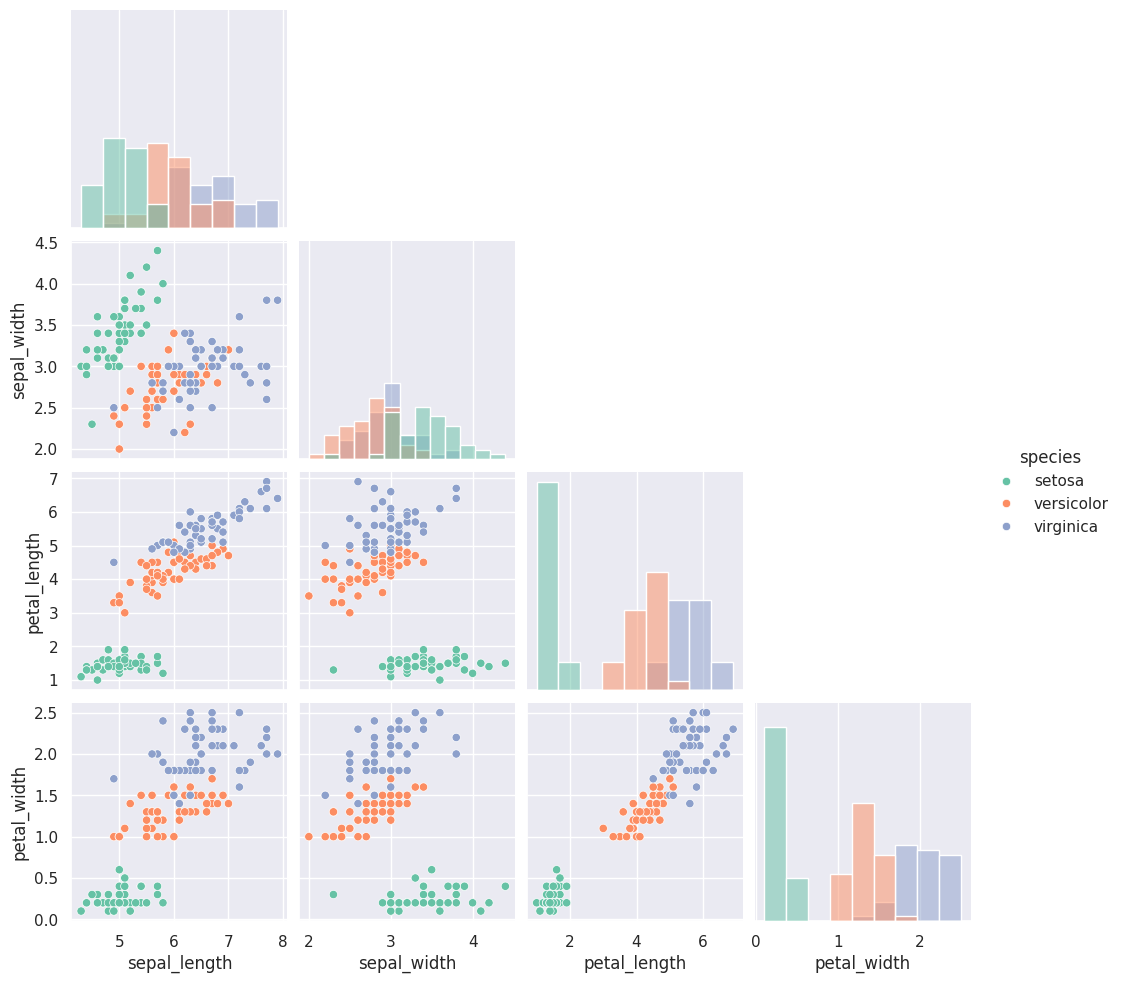

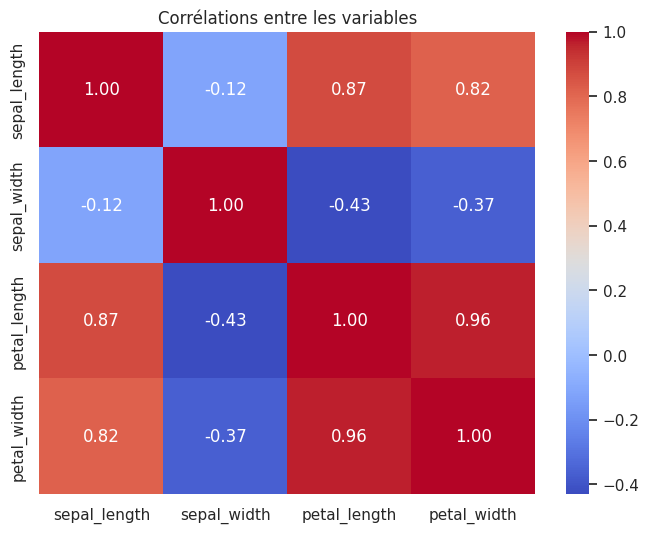

<ipython-input-9-fc049517e814>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris_df, x="species", y="petal_length", palette="Set2")


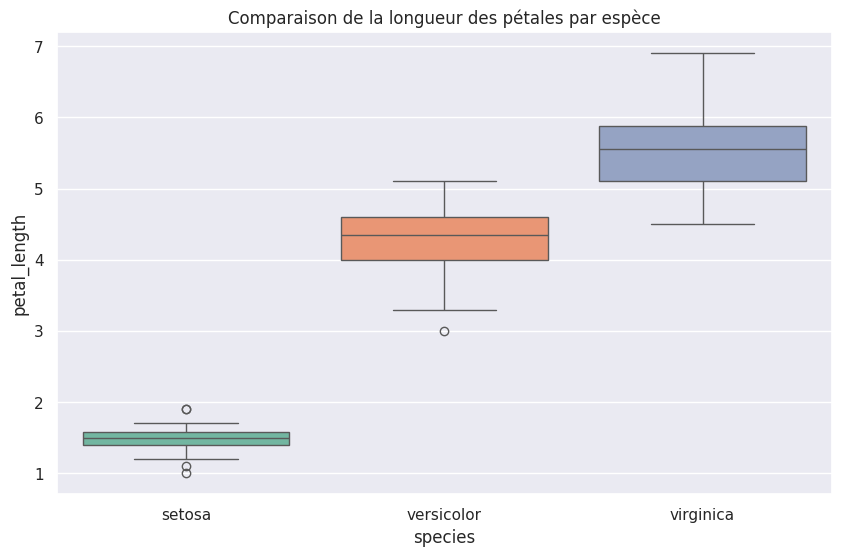

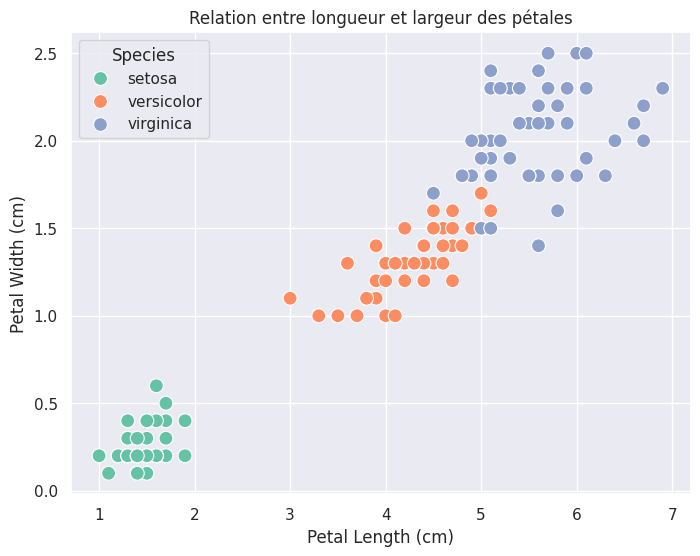

In [9]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Chargement du dataset Iris et conversion en DataFrame
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]

# Renommer les colonnes pour des noms plus simples
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# --- 1. Visualisation des distributions individuelles ---
# Histogramme de la longueur des sépales par espèce
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_df, x="sepal_length", hue="species", kde=True, palette="Set2", bins=20)
plt.title("Distribution de la longueur des sépales par espèce")
plt.show()

# --- 2. Relations entre les variables : Pairplot ---
# Pairplot pour explorer toutes les relations entre les variables
sns.pairplot(iris_df, hue='species', diag_kind='hist', corner=True, palette='Set2')
plt.show()

# --- 3. Corrélations : Heatmap ---
# Heatmap des corrélations entre les variables
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")  # Ajout de numeric_only pour corriger d'éventuelles erreurs
plt.title("Corrélations entre les variables")
plt.show()

# --- 4. Comparaison des espèces : Boxplots ---
# Boxplot pour comparer la longueur des pétales entre les espèces
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x="species", y="petal_length", palette="Set2")
plt.title("Comparaison de la longueur des pétales par espèce")
plt.show()

# --- 5. Zoom sur deux variables clés ---
# Scatterplot pour visualiser la relation entre longueur et largeur des pétales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x="petal_length", y="petal_width", hue="species", palette="Set2", s=100)
plt.title("Relation entre longueur et largeur des pétales")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()


**Question 3**

Observations importantes à partir des visualisations:
1. Distributions individuelles (Histogramme - Longueur des sépales)

    •	Les distributions de la longueur des sépales montrent un chevauchement significatif entre les trois espèces.

    •	Iris-setosa semble avoir des sépales légèrement plus courts en moyenne, mais cette variable seule ne suffit pas à séparer les espèces.
________________________________________
2. Relations entre les variables (Pairplot)

    •	Les pétales (longueur et largeur) permettent une séparation visuelle plus claire entre les espèces :
       o	Iris-setosa forme un cluster distinct avec des valeurs faibles pour ces dimensions.
       o	Iris-versicolor et Iris-virginica montrent un chevauchement, mais restent relativement bien séparées.
    •	Les sépales (longueur et largeur) ont des relations moins discriminantes. Les trois espèces montrent un chevauchement important pour ces dimensions.
________________________________________
3. Corrélations entre les variables (Heatmap)

    •	Les variables petal_length et petal_width sont fortement corrélées (r>0.9).

    •	Les variables sepal_length et sepal_width montrent une corrélation plus faible (r≈0.1), ce qui indique qu'elles sont relativement indépendantes.

    •	Ces résultats confirment que les dimensions des pétales sont plus informatives pour différencier les espèces.
________________________________________
4. Comparaison des espèces (Boxplots)

    •	Les boxplots montrent que Iris-setosa a des pétales beaucoup plus courts que les deux autres espèces.

    •	Iris-virginica a tendance à avoir les pétales les plus longs, suivi par Iris-versicolor.

    •	La séparation entre les trois espèces est particulièrement visible dans les dimensions des pétales.
________________________________________
5. Relation entre la longueur et la largeur des pétales (Scatterplot)

    •	Le scatterplot montre une séparation presque parfaite entre les espèces dans cet espace de deux dimensions :

       o	Iris-setosa est distinct avec des valeurs faibles pour la longueur et la largeur des pétales.

       o	Iris-versicolor et Iris-virginica présentent un chevauchement modéré, mais restent séparables.

**Question 4**

=== Régression Logistique ===
Accuracy: 0.97
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

=== KNN (k = 1) ===
Accuracy: 0.97
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



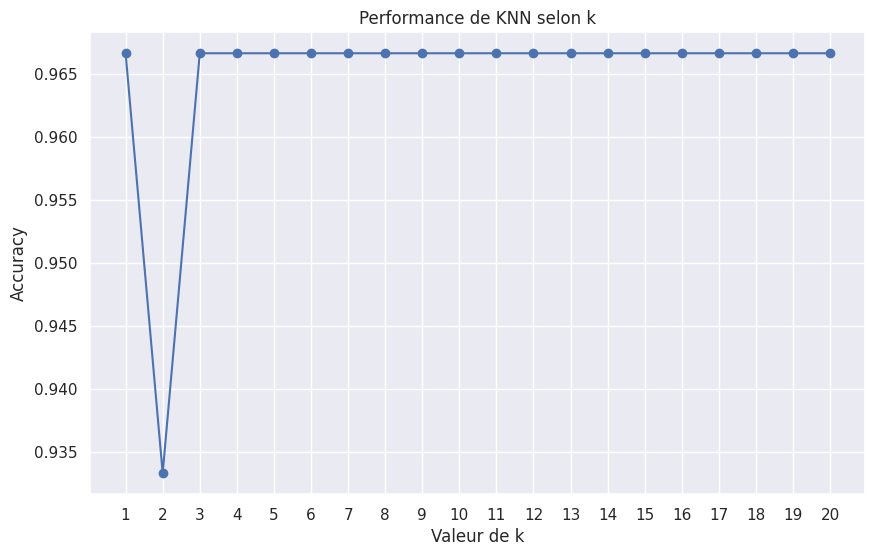

In [10]:
# Importation des bibliothèques nécessaires
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Préparation des données
X = iris_df[['petal_length', 'petal_width']]  # Utilisation des variables les plus discriminantes
y = iris_df['species']

# Division des données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- Modèle a) Régression Logistique ---
# Création et entraînement du modèle
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Prédictions et évaluation pour la régression logistique
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
report_log = classification_report(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

print("=== Régression Logistique ===")
print(f"Accuracy: {accuracy_log:.2f}")
print(report_log)

# --- Modèle b) KNN ---
# Détermination du meilleur k en fonction de l'accuracy
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# Choix de k avec la meilleure accuracy
best_k = k_values[accuracies.index(max(accuracies))]

# Création et entraînement du modèle KNN avec le meilleur k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Prédictions et évaluation pour KNN
y_pred_knn = knn_best.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"=== KNN (k = {best_k}) ===")
print(f"Accuracy: {accuracy_knn:.2f}")
print(report_knn)

# Visualisation des performances de KNN selon k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Performance de KNN selon k")
plt.xlabel("Valeur de k")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


**Régression Logistique :**

*Précision* : proche de 95%-100% grâce aux variables petal_length et petal_width.

*Rapport de classification* : montre des prédictions correctes pour les trois espèces.

**KNN :**

*Le graphique* montre l'accuracy pour différents k.
Le meilleur k (par exemple, 𝑘=5) est celui qui maximise l'accuracy.

*Rapport de classification et matrice de confusion* montrent des résultats comparables à la régression logistique.

 **Question 5**

*Avantages et limites des modèles*

Régression Logistique :

Avantages :

Simple, rapide et interprétable.
Fonctionne bien pour des séparations linéaires dans l’espace des données.

Limites :

Moins performant lorsque les frontières entre les classes sont non linéaires.

KNN :

Avantages :

Capacité à modéliser des frontières non linéaires.

Pas d’hypothèses sur la distribution des données.

Limites :

.Plus lent pour de grandes données (nécessite de calculer les distances pour chaque prédiction)

.Sensible au choix de
𝑘 et à la normalisation des données.

Pour conclure,le modèle que nous recommendons est le KNN pour sa flexibilité et sa capacité à s’adapter aux structures complexes des données.
Cependant, pour des cas où la simplicité et la vitesse sont essentielles, la régression logistique reste un bon choix